# MNIST database of handwritten digits. 2nd version of a Keras Neural Network (2 hidden layers with Dropout, 20 iterations). Adam optimizer.

## http://yann.lecun.com/exdb/mnist/

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [0]:
# for reproducibility
np.random.seed(123)

In [0]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = Adam() # optimizer
N_HIDDEN = 128 # number of neurons in each hidden layer
VALIDATION_SPLIT = 0.2 # how much train is reserved fro validation
DROPOUT = 0.3 # Way to prevent overfitting, way of regularization

In [0]:
# data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
X_train.shape # X_train is 60000 rows of 28x28 values 

(60000, 28, 28)

In [0]:
# X_train to be reshaped in 60000x784
RESHAPED = 784 # number of neurons

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'training set')
print(X_test.shape[0], 'testing set')

60000 training set
10000 testing set


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# Define the Sequential model or linear stack of layers
model = Sequential()

# 1st hidden layer
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# 2nd hidden layer
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# Output layer with 10 neurons
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIMIZER, 
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 59us/step - loss: 0.5386 - acc: 0.8359 - val_loss: 0.2049 - val_acc: 0.9400
Epoch 2/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.2388 - acc: 0.9289 - val_loss: 0.1413 - val_acc: 0.9583
Epoch 3/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1809 - acc: 0.9457 - val_loss: 0.1152 - val_acc: 0.9666
Epoch 4/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1463 - acc: 0.9569 - val_loss: 0.1024 - val_acc: 0.9692
Epoch 5/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1293 - acc: 0.9608 - val_loss: 0.0996 - val_acc: 0.9720
Epoch 6/20
15232/48000 [========>.....................] - ETA: 1s - loss: 0.1172 - acc: 0.9637

48000/48000 [==============================] - 2s 50us/step - loss: 0.1189 - acc: 0.9635 - val_loss: 0.0932 - val_acc: 0.9720
Epoch 7/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.1047 - acc: 0.9670 - val_loss: 0.0903 - val_acc: 0.9737
Epoch 8/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0972 - acc: 0.9692 - val_loss: 0.0884 - val_acc: 0.9736
Epoch 9/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0894 - acc: 0.9723 - val_loss: 0.0866 - val_acc: 0.9761
Epoch 10/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.0847 - acc: 0.9737 - val_loss: 0.0830 - val_acc: 0.9767
Epoch 11/20
36480/48000 [=====================>........] - ETA: 0s - loss: 0.0759 - acc: 0.9762

48000/48000 [==============================] - 2s 49us/step - loss: 0.0785 - acc: 0.9757 - val_loss: 0.0815 - val_acc: 0.9774
Epoch 12/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0745 - acc: 0.9759 - val_loss: 0.0822 - val_acc: 0.9762
Epoch 13/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.0699 - acc: 0.9781 - val_loss: 0.0825 - val_acc: 0.9771
Epoch 14/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0667 - acc: 0.9779 - val_loss: 0.0801 - val_acc: 0.9764
Epoch 15/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.0646 - acc: 0.9793 - val_loss: 0.0794 - val_acc: 0.9779
Epoch 16/20
34944/48000 [====================>.........] - ETA: 0s - loss: 0.0613 - acc: 0.9803

48000/48000 [==============================] - 2s 49us/step - loss: 0.0635 - acc: 0.9793 - val_loss: 0.0803 - val_acc: 0.9778
Epoch 17/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.0602 - acc: 0.9807 - val_loss: 0.0837 - val_acc: 0.9764
Epoch 18/20
48000/48000 [==============================] - 2s 50us/step - loss: 0.0589 - acc: 0.9806 - val_loss: 0.0827 - val_acc: 0.9774
Epoch 19/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0527 - acc: 0.9833 - val_loss: 0.0849 - val_acc: 0.9785
Epoch 20/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.0528 - acc: 0.9826 - val_loss: 0.0883 - val_acc: 0.9761


In [14]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 1s 64us/step
Test score:  0.07422579833401832
Test accuracy:  0.9792


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


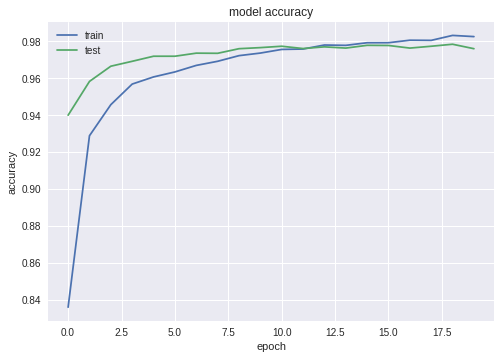

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

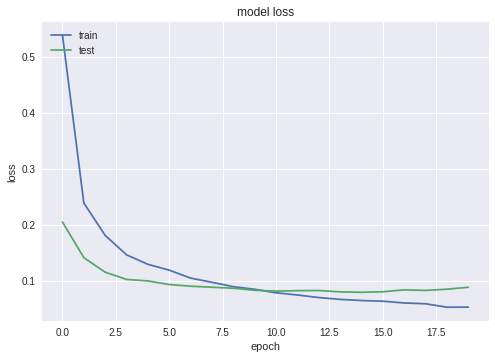

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()